In [274]:
import pandas as pd 
df = pd.read_csv('pokemon.csv')
df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [275]:
df=df.drop('#',axis=1)

In [276]:
df.dtypes

Name          object
Type 1        object
Type 2        object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object

In [277]:
df.isna().sum()

Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [278]:
df.isna().sum()/len(df)

Name          0.0000
Type 1        0.0000
Type 2        0.4825
Total         0.0000
HP            0.0000
Attack        0.0000
Defense       0.0000
Sp. Atk       0.0000
Sp. Def       0.0000
Speed         0.0000
Generation    0.0000
Legendary     0.0000
dtype: float64

In [279]:
mask = df.isna().sum()/len(df) < 0.3
print(mask)

Name           True
Type 1         True
Type 2        False
Total          True
HP             True
Attack         True
Defense        True
Sp. Atk        True
Sp. Def        True
Speed          True
Generation     True
Legendary      True
dtype: bool


In [280]:
reduced_df = df.loc[:,mask]

In [281]:
reduced_df.shape

(800, 11)

In [282]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
cols = ['Name','Type 1']
for col in cols:
        reduced_df[col]=l.fit_transform(df[col])
        print(reduced_df[col])

0       80
1      329
2      745
3      746
4      102
      ... 
795    160
796    161
797    314
798    315
799    756
Name: Name, Length: 800, dtype: int32
0       9
1       9
2       9
3       9
4       6
       ..
795    15
796    15
797    14
798    14
799     6
Name: Type 1, Length: 800, dtype: int32


<Axes: >

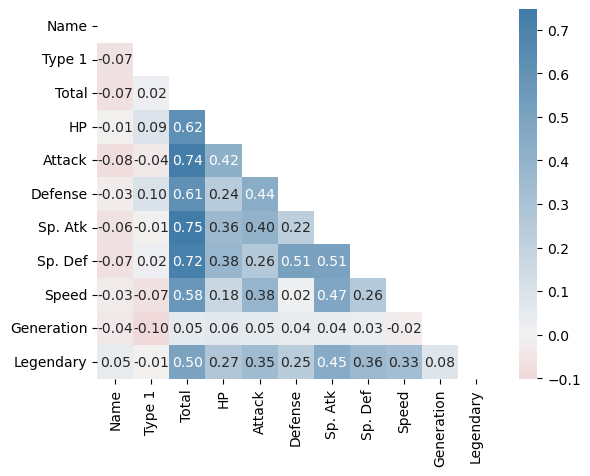

In [283]:
import numpy as np
import seaborn as sns
cmap = sns.diverging_palette(h_neg=10, h_pos=240, as_cmap=True)
corr = reduced_df.corr()
mask = np.triu(np.ones_like(corr,dtype=bool))
sns.heatmap(corr,mask=mask,
           center=0,cmap=cmap,annot=True,fmt='.2f')

In [284]:
corr_df = reduced_df.corr().abs()
mask = np.triu(np.ones_like(corr_df,dtype=bool))
tri_df = corr_df.mask(mask) 
tri_df

,Name,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type 1,0.067074,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total,0.071396,0.023251,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HP,0.008356,0.094230,0.618748,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Attack,0.081029,0.037525,0.736211,0.422386,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Defense,0.025437,0.103439,0.612787,0.239622,0.438687,NaN,NaN,NaN,NaN,NaN,NaN
Sp. Atk,0.063574,0.006694,0.747250,0.362380,0.396362,0.223549,NaN,NaN,NaN,NaN,NaN
Sp. Def,0.069318,0.018911,0.717609,0.378718,0.263990,0.510747,0.506121,NaN,NaN,NaN,NaN
Speed,0.031623,0.066471,0.575943,0.175952,0.381240,0.015227,0.473018,0.259133,NaN,NaN,NaN
Generation,0.035371,0.101129,0.048384,0.058683,0.051451,0.042419,0.036437,0.028486,0.023121,NaN,NaN


In [285]:
to_drop = [c for c in tri_df.columns if any(tri_df[c]>0.8)] # 0.8
print(to_drop)
reduced_df = reduced_df.drop(to_drop,axis=1)
reduced_df.shape

[]


(800, 11)

In [286]:
reduced_df['Legendary'].unique()

array([False,  True])

In [287]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(reduced_df),columns=reduced_df.columns)
df_scaled.var()

Name          1.001252
Type 1        1.001252
Total         1.001252
HP            1.001252
Attack        1.001252
Defense       1.001252
Sp. Atk       1.001252
Sp. Def       1.001252
Speed         1.001252
Generation    1.001252
Legendary     1.001252
dtype: float64

In [298]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = reduced_df.drop(['Name','Legendary'],axis=1)
y = reduced_df['Legendary']
# Step 1: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

# Step 2: Define and train the XGBoost classifier
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

# Step 3: Predict on the test set
y_pred = model.predict(X_test)

# Step 4: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9625


In [299]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

# Your code here


In [300]:
# Predict labels for training and testing sets
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)
# Calculate accuracy scores
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

print("Training accuracy:", train_accuracy)
print("Testing accuracy:", test_accuracy)

Training accuracy: 1.0
Testing accuracy: 0.9625


In [301]:
from sklearn.ensemble import RandomForestClassifier
# Build the pipeline
pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('reducer', PCA(n_components=2)),
        ('classifier', RandomForestClassifier(random_state=0))])

# Fit the pipeline to the training data
pipe.fit(X_train,y_train)

# Prints the explained variance ratio
print(pipe['reducer'].explained_variance_ratio_)

[0.41513735 0.13104307]


In [302]:
# Score the accuracy on the test set
accuracy = pipe.score(X_test,y_test)

# Prints the model accuracy
print(f'{accuracy:.1%} test set accuracy')

95.6% test set accuracy


In [303]:
# Build the pipeline
pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('reducer', PCA(n_components=3)),
        ('classifier', RandomForestClassifier(random_state=0))])

# Fit the pipeline to the training data
pipe.fit(X_train, y_train)

# Score the accuracy on the test set
accuracy = pipe.score(X_test, y_test)

# Prints the explained variance ratio and accuracy
print(pipe['reducer'].explained_variance_ratio_)
print(f'{accuracy:.1%} test set accuracy')

[0.41513735 0.13104307 0.11874901]
98.1% test set accuracy
